In [1]:
def NVol(P):
    n = P.dim()
    return (factorial(n)/sqrt(n+1))*P.volume("induced")

In [2]:
P_12 = Polyhedron(vertices=[[1,0,0],[0,1,0]])
P_13 = Polyhedron(vertices=[[1,0,0],[0,0,1]])
P_23 = Polyhedron(vertices=[[0,1,0],[0,0,1]])
P_123 = Polyhedron(vertices=[[1,0,0],[0,0,1],[0,1,0]])


Q = P_12+P_13+P_23
(2/sqrt(3))*Q.volume(measure="induced")

print(NVol(Q))

6


In [2]:
P_12 = Polyhedron(vertices=[[1,0,0,0],[0,1,0,0]])
P_13 = Polyhedron(vertices=[[1,0,0,0],[0,0,1,0]])
P_14 = Polyhedron(vertices=[[1,0,0,0],[0,0,0,1]])
P_23 = Polyhedron(vertices=[[0,1,0,0],[0,0,1,0]])
P_24 = Polyhedron(vertices=[[0,1,0,0],[0,0,0,1]])
P_34 = Polyhedron(vertices=[[0,0,1,0],[0,0,0,1]])
P_123 = Polyhedron(vertices=[[1,0,0,0],[0,1,0,0],[0,0,1,0]])
P_124 = Polyhedron(vertices=[[1,0,0,0],[0,1,0,0],[0,0,0,1]])
P_134 = Polyhedron(vertices=[[1,0,0,0],[0,0,1,0],[0,0,0,1]])
P_234 = Polyhedron(vertices=[[0,1,0,0],[0,0,1,0],[0,0,0,1]])
P_1234 = Polyhedron(vertices=[[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])


Q = P_12+P_13+P_14+P_23+P_24+P_34+P_123+P_124+P_234+P_134+P_1234
#Q = P_12+P_13+P_14+P_23+P_34+P_123+P_134


In [2]:
#Volume of complete complex polytope

def volCCP(d,n):
    C = [ i for i in Subsets([j for j in range(1,d+1)]).list() if ( i.cardinality() < n+1 and i.cardinality() > 1)]
    P = Polyhedron(vertices=[zero_vector(d)])

    for S in C:
        size = len(S)
        vertices = []
        for i in S:
            vec = zero_vector(d)
            vec[i-1] = 1
            vertices.append(vec)

        P = P + Polyhedron(vertices)

    return(NVol(P))

#Dimension
d = 4

#Max. dimension of faces considered
n = d

print(volCCP(d,n))

1009


[[3, 1], [4, 2], [5, log(125)/log(5)], [6, log(1296)/log(6)]]


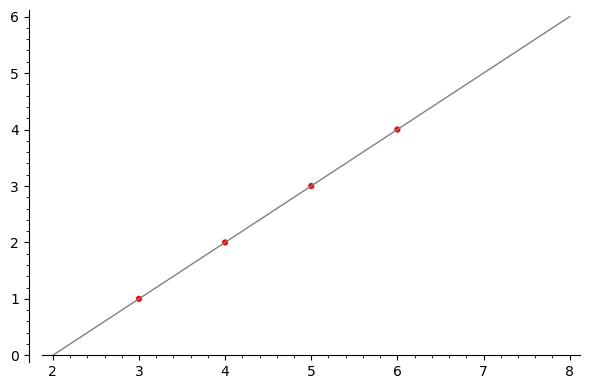

In [133]:
#Verification of Vol(K_n) = n^(n-2)

k=6

points = []
for i in range(3,k+1):
    points.append([i,log(volCCP(i,2)/factorial(i-1),i)])
print(points)

var('m,b')
mymodel(x) = m*x + b 
myfit = find_fit(points,mymodel,solution_dict=True)

g = Graphics()
#g += list_plot_semilogy(points3, size=40, color="green")
g += list_plot(points, size=20, color="red")
#g += list_plot_semilogy([[n,n^(n-2)] for n in range(4,8)], size=50, color="red")
g += plot(myfit[m]*x + myfit[b] , (x, 2, 8), color="grey")
g.show()

In [187]:
#Volume of simplicial complex polytopes given the simplicial complex description

#Number of vertices in the complex
n = 4

#Set of simplices of the complex:
C = [[1,2],[1,3],[2,3],[1,2,3],[1,4],[3,4],[1,3,4]]
P = Polyhedron(vertices=[zero_vector(n)])

for S in C:
    size = len(S)
    vertices = []
    for i in S:
        vec = zero_vector(n)
        vec[i-1] = 1
        vertices.append(vec)
    P = P + Polyhedron(vertices)

print(NVol(P))

327


In [188]:
print(volCCP(4,3))

696


[[3, log(13/24)/log(3)], [4, 1/2*log(29/5)/log(2)], [5, log(1093/8)/log(5)], [6, log(11523/2)/log(6)]]
1.795940301457508 -5.932265999180477


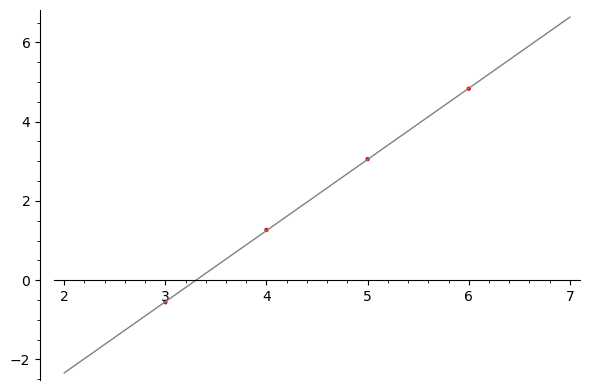

In [193]:
#2-skeleton of d-simplex

data = [13, 696, 98370, 29037960]
points = []
cont = 3
for i in data:
    points.append([cont,log(i/factorial(cont+1),cont)])
    cont = cont +1
print(points)

var('m,b')
mymodel(x) = m*x + b 
myfit = find_fit(points,mymodel,solution_dict=True)

print(myfit[m],myfit[b])

g = Graphics()
g += list_plot(points, size=10, color="red")
g += plot(myfit[m]*x + myfit[b] , (x, 2, 7), color="grey")
g.show()

In [192]:
def g(n):
    return factorial(n-1)*n^(myfit[m]*n+myfit[b])

print(g(5))

99272.84503826099


In [94]:
#Snake complex: Joining N 2-dim simpleces by a facet

def volSCP(N):

    #Construction of Simplices

    C = [[1,2],[1,3],[2,3],[1,2,3]]

    m = 3

    for k in range(1,N):
        C.append([m-1,m+1])
        C.append([m,m+1])
        C.append([m-1,m,m+1])
        m = m + 1
        
    print(len(C))

    #Number of vertices
    n = m    

    P = Polyhedron(vertices=[zero_vector(n)])

    for S in C:
        size = len(S)
        vertices = []
        for i in S:
            vec = zero_vector(n)
            vec[i-1] = 1
            vertices.append(vec)
        P = P + Polyhedron(vertices)

    return(NVol(P))

In [17]:
volSCP(3)

NameError: name 'volSCP' is not defined

In [5]:
data = []

num = 4

for i in range(1,num+1):
    data.append(volSCP(i))

print(data)

[13, 180, 3210, 71250]


1.001480116913475 0.2695343953810635


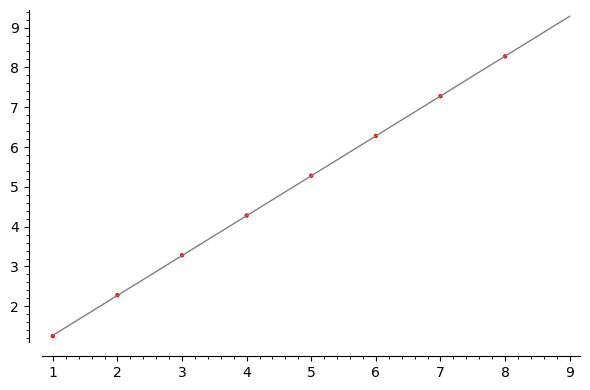

In [19]:
data = [13, 180, 3210, 71250, 1896750,58905000,2090655000,83476575000]

l = 4.445

points = []

cont = 1

for num in data:
    points.append([cont,log(num/factorial(cont+1),l)])
    cont = cont +1

var('a,b,c,d')
mymodel(x) = b*x+c
myfit = find_fit(points,mymodel,solution_dict=True)

print(myfit[b],myfit[c])

g = Graphics()
g += list_plot(points, size=10, color="red")
g += plot(myfit[b]*x+myfit[c] , (x, 1,len(data)+1),color="grey")
g.show()

In [151]:
def f(n):
    return factorial(n+1)*l^(myfit[b]*n+myfit[c])

print(f(5))

1.89278130993499e6


In [100]:
# Joining 2 d-dim simpleces by a facet

def vol2S(d):

    #Construction of Simplices

    C1 = [ i for i in Subsets([j for j in range(1,d+1)]).list() if ( i.cardinality() < 4 and i.cardinality() > 1)]
    C2 = [ i for i in Subsets([j for j in range(2,d+2)]).list() if ( i.cardinality() < 4 and i.cardinality() > 1 and d+1 in i)]
    
    C = C1 + C2
    
    #Number of vertices
    n = d+2

    P = Polyhedron(vertices=[zero_vector(n)])

    for S in C:
        size = len(S)
        vertices = []
        for i in S:
            vec = zero_vector(n)
            vec[i-1] = 1
            vertices.append(vec)
        P = P + Polyhedron(vertices)

    return(NVol(P))

In [128]:
data = []

num = 5

for i in range(2,num+1):
    data.append(vol2S(i))

print(data)

[2, 180, 33444, 11773200]


In [ ]:
l = 1

points = []

cont = 1

for num in data:
    points.append([cont,log(num,cont+1)])
    cont = cont +1

print(points)

var('a,b,c,d')
mymodel(x) = a*x^2+b*x+c
myfit = find_fit(points,mymodel,solution_dict=True)

print(myfit[a],myfit[b],myfit[c])

g = Graphics()
g += list_plot(points, size=10, color="red")
g += plot(myfit[a]*x^2+myfit[b]*x+myfit[c] , (x, 1,5),color="grey")
g.show()

In [13]:
# Complex of triangulation of k-agon

def volTC(k):

    #Construction of Simplices
    
    C = [[1,k+1]]
    
    for i in range(2,k+1):
        C.append([i-1,i])
        C.append([i,k+1])
        C.append([i-1,i,k+1])
        
    C.append([1,k])
    C.append([1,k,k+1])
    
    print(len(C))
    
    #Number of vertices
    n = k+1

    P = Polyhedron(vertices=[zero_vector(n)])

    for S in C:
        size = len(S)
        vertices = []
        for i in S:
            vec = zero_vector(n)
            vec[i-1] = 1
            vertices.append(vec)
        P = P + Polyhedron(vertices)

    
    return(NVol(P))

In [16]:
print(volTC(4))

NameError: name 'volTC' is not defined

[[3, log(157/8)/log(3)], [4, 1/2*log(741/10)/log(2)], [5, log(6743/24)/log(5)], [6, log(1080)/log(6)], [7, log(269593/64)/log(7)]]
0.3951106342853963 1.5255766711795613


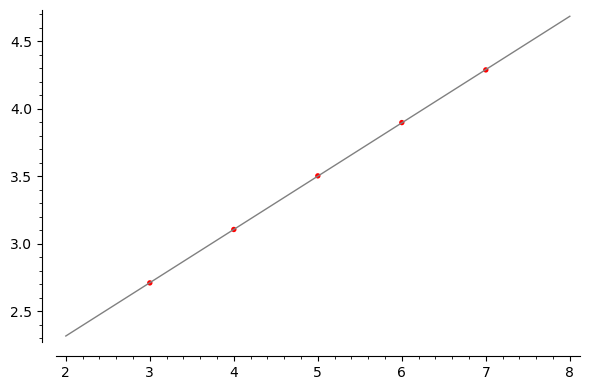

In [15]:
data = [471, 8892, 202290, 5443200, 169843590]

points = []

cont = 3

for num in data:
    points.append([cont,log(num/factorial(cont+1),cont)])
    cont = cont +1

print(points)

var('a,b,c,d')
mymodel(x) = b*x+c
myfit = find_fit(points,mymodel,solution_dict=True)

print(myfit[b],myfit[c])

g = Graphics()
g += list_plot(points, size=15, color="red")
g += plot(myfit[b]*x+myfit[c] , (x, 2,8),color="grey")
g.show()

In [33]:
#s1 and s2 must be lists of lists

def cartProduct(s1,s2):
    return [i+j for i in s1 for j in s2]

In [66]:
#Multiplicity of the winning set

def multiplicity(s,n):
    cants = [0]*n
    for i in range(0,n):
        temp = [elem for elem in s if elem==i]
        cants[i] = len(temp)
        
    calc = factorial(len(s))
    for i in range(0,n):
        calc = calc / factorial(cants[i])
    
    return calc

In [125]:
#Checking if a set of edges is a tree of n vertices. 

def is_tree(t,n):
    bol = True
    
    for s in [sub for sub in Subsets(range(0,len(t))) if sub.cardinality()> 1]:
        if(bol==False): 
            break
        else:
            lista = s.list()
            conj = []
            for i in lista:
                conj.extend(t[i])
            
            conj = set(conj)
            if(len(conj) <= s.cardinality()):
                bol=False
                
    return bol

In [132]:
def volumePC(C):

    print("Complex:")
    print(C)

    #Calculate the number of vertices: the maximum in C

    n=0
    for i in C:
        m = max(i)
        if (m > n):
            n = m

    print("")
    print("Number of vertices:")
    print(n)

    # (1) Finding spanning trees of C^(1)

    edges = [ i for i in C if (len(i)==2)]

    trees = []

    for i in Subsets(range(1,len(edges)+1)).list():
        if len(i.list()) == n-1:
            temp = []
            for j in i.list():
                temp.append(edges[j-1])

            elems = [k for l in temp for k in l]

            if (set(elems) == set(range(1,n+1)) and is_tree(temp,n)):
                trees.append(temp)  

    # (2) Find winning sets

    WS = []

    for t in trees:

        #Create matrix of inclusions M_ij = 1 iiff C[i] is subset of C[j]
        m = []
        for i in range(0,n-1):
            vec = [0] * (len(C))
            edge = t[i]
            edge_set = set(edge)

            for j in range(0,len(C)):
                s = set(C[j])
                if (edge_set.issubset(s)):
                    vec[j]=1

            m.append(vec)

        #indices of 1's
        ones = []

        for l in range(0,len(t)):
            index = []
            listica = m[l]
            for j in range(0,len(listica)):
                if listica[j]==1:
                    index.append([j])
            ones.append(index)

        #Cartesian product of all different ones    
        prod = ones[0]
        for ind in range(1,len(ones)):
            prod = cartProduct(prod,ones[ind])

        WS = WS + prod

    #print(WS)

    for i in range(0,len(WS)):
        li = WS[i]
        WS[i] = sorted(li)

    #print(WS)

    result = []

    for i in WS:
        if i not in result:
            result.append(i)

    #print(result)

    vol = 0

    for ws in result:
        vol = vol + multiplicity(ws,len(C))
    
    
    print("")

    print("Volume of P_C:")
    return(vol)

In [138]:
C = [[1,2],[1,3],[2,3],[1,2,3],[2,4],[3,4],[2,3,4],[3,5],[4,5],[3,4,5],[4,6],[5,6],[4,5,6],[5,7],[6,7],[5,6,7],[6,8],[7,8],[6,7,8]]

print(volumePC(C))

Complex:
[[1, 2], [1, 3], [2, 3], [1, 2, 3], [2, 4], [3, 4], [2, 3, 4], [3, 5], [4, 5], [3, 4, 5], [4, 6], [5, 6], [4, 5, 6], [5, 7], [6, 7], [5, 6, 7], [6, 8], [7, 8], [6, 7, 8]]

Number of vertices:
8

Volume of P_C:
58905000.0
